In [1]:
import numpy as np
import pandas as pd

In [2]:
df_albany = pd.read_csv('../cleaned-data-frames/albany.csv')
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [3]:
# Making the lengths same
df_albany = df_albany.iloc[0:7560,:]
display(df_albany)
display(target)

df_albany.__delitem__('name')

,Unnamed: 0,Unnamed: 0.1,name,time,month,day,hourly_temperature,hourly_wind_speed,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,solar,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
0,0,26277,"ALBANY INTERNATIONAL AIRPORT, NY US",1,1,1,-4.1,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
1,1,26278,"ALBANY INTERNATIONAL AIRPORT, NY US",2,1,1,-4.2,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
2,2,26279,"ALBANY INTERNATIONAL AIRPORT, NY US",3,1,1,-4.4,3.5,19.239583,19.879067,48.847905,30.226074,5.689710,264.743208,0.0,0.0,0.0,0.0,0.0
3,3,26280,"ALBANY INTERNATIONAL AIRPORT, NY US",4,1,1,-4.5,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
4,4,26281,"ALBANY INTERNATIONAL AIRPORT, NY US",5,1,1,-4.7,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,7555,33832,"ALBANY INTERNATIONAL AIRPORT, NY US",20,11,11,5.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7556,7556,33833,"ALBANY INTERNATIONAL AIRPORT, NY US",21,11,11,4.9,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7557,7557,33834,"ALBANY INTERNATIONAL AIRPORT, NY US",22,11,11,4.6,3.3,13.380017,13.684076,40.707397,23.794235,5.053304,224.012059,0.0,0.0,0.0,0.0,0.0
7558,7558,33835,"ALBANY INTERNATIONAL AIRPORT, NY US",23,11,11,4.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,index,Year,Month,Day,Hour,Consumption
0,0,0,2020,1,1,1,15417.0
1,1,315,2020,1,1,2,14891.0
2,2,630,2020,1,1,3,14506.0
3,3,945,2020,1,1,4,14226.0
4,4,1260,2020,1,1,5,14211.0
...,...,...,...,...,...,...,...
7531,7531,6299,2020,11,10,20,17489.0
7532,7532,6614,2020,11,10,21,16750.0
7533,7533,6929,2020,11,10,22,15963.0
7534,7534,7244,2020,11,10,23,15060.0


In [4]:
df_albany = df_albany.reset_index()
target = target.reset_index()

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_albany)
clean_dataset(target)

display(df_albany)
display(target)

,index,Unnamed: 0,Unnamed: 0.1,time,month,day,hourly_temperature,hourly_wind_speed,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,solar,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
0,0,0,26277,1,1,1,-4.1,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
1,1,1,26278,2,1,1,-4.2,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
2,2,2,26279,3,1,1,-4.4,3.5,19.239583,19.879067,48.847905,30.226074,5.689710,264.743208,0.0,0.0,0.0,0.0,0.0
3,3,3,26280,4,1,1,-4.5,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
4,4,4,26281,5,1,1,-4.7,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,7555,7555,33832,20,11,11,5.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7556,7556,7556,33833,21,11,11,4.9,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7557,7557,7557,33834,22,11,11,4.6,3.3,13.380017,13.684076,40.707397,23.794235,5.053304,224.012059,0.0,0.0,0.0,0.0,0.0
7558,7558,7558,33835,23,11,11,4.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0


,level_0,Unnamed: 0,index,Year,Month,Day,Hour,Consumption
0,0,0,0,2020,1,1,1,15417.0
1,1,1,315,2020,1,1,2,14891.0
2,2,2,630,2020,1,1,3,14506.0
3,3,3,945,2020,1,1,4,14226.0
4,4,4,1260,2020,1,1,5,14211.0
...,...,...,...,...,...,...,...,...
7531,7531,7531,6299,2020,11,10,20,17489.0
7532,7532,7532,6614,2020,11,10,21,16750.0
7533,7533,7533,6929,2020,11,10,22,15963.0
7534,7534,7534,7244,2020,11,10,23,15060.0


In [28]:
# Performing linear regression
from sklearn.linear_model import LinearRegression

y = target.Consumption

x = df_albany[['AWT26_Power',
       'AWP_200_Power', 'D2CF_200_Power', 'AN_Bonus_150/30_Power',
       'Aria_20_Power', 'WWD-1_D64_Power','Solar_AllMax',
       'Solar_TrinaSolar', 'Solar_Mitsubishi', 'Solar_FirstSolar']]
X=x.iloc[:7535,:]

X = X/100

In [29]:
X[1:50]

,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
1,0.225037,0.231811,0.527758,0.336806,0.060107,2.847622,0.000000,0.000000,0.000000,0.000000
2,0.192396,0.198791,0.488479,0.302261,0.056897,2.647432,0.000000,0.000000,0.000000,0.000000
3,0.225037,0.231811,0.527758,0.336806,0.060107,2.847622,0.000000,0.000000,0.000000,0.000000
4,0.225037,0.231811,0.527758,0.336806,0.060107,2.847622,0.000000,0.000000,0.000000,0.000000
5,0.225037,0.231811,0.527758,0.336806,0.060107,2.847622,0.000000,0.000000,0.000000,0.000000
6,0.192396,0.198791,0.488479,0.302261,0.056897,2.647432,0.000000,0.000000,0.000000,0.000000
7,0.225037,0.231811,0.527758,0.336806,0.060107,2.847622,0.009867,0.011019,0.008223,0.014307
8,0.336486,0.336071,0.644417,0.446785,0.069873,3.458103,0.068767,0.076789,0.057296,0.099702
9,0.566289,0.513802,0.852802,0.636788,0.086737,4.590466,0.136830,0.152794,0.113989,0.198367
10,0.672456,0.582133,0.945167,0.710586,0.093720,5.096987,1.062483,1.186440,0.883036,1.538178


In [8]:
target_vector = target['Consumption']

In [9]:
input = X

In [10]:
# recognising the solution space for this data:

magnitude_of_consumption_values = np.min(target['Consumption'])

magnitude_of_consumption_values

0.0

In [11]:
weights_size = len(input.iloc[0])
solutions_per_problem = 200

pop_size = (solutions_per_problem, weights_size)
new_population = np.random.randint(low = 1000, high= 10000000, size = pop_size)

pop_original = new_population

In [12]:
new_population

array([[6620045, 7160522, 1966634, ..., 9358404, 7756817, 1492907],
       [7081973, 9756471, 4895785, ..., 6497825, 6155080,  983551],
       [7766992, 6786019, 7028757, ..., 9689502, 9573001, 1400778],
       ...,
       [1253419, 5463755, 9691401, ..., 4449246, 6878611, 2033860],
       [ 900377,  654502, 6302132, ..., 8752313, 1074420, 7120020],
       [8388078, 9260295, 1878156, ..., 5996512,   22899, 5736268]])

In [13]:
# fitness of each population:


def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_vector
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness



In [14]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [15]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    
    # Choose mating (crossover) point randomly:
    
    division_point =  np.random.randint(low = 2, high= (parents.shape[1]) - 1 )
    
    
    crossover_point = np.uint8(offspring_size[1]/ division_point )
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [16]:
# Mutations on the offsprings:

mutation_probability = 20 # In percent

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < mutation_probability :
        
        for idx in range(offspring_operated.shape[0]):

        # The random value to be added to the gene.

            random_value = np.random.randint(low = 0 , high= 5)
            
            # select the column to be mutated
            
            col = np.random.randint(low = 0, high = (offspring_crossover.shape[1] - 1))

            offspring_operated[idx, col] = offspring_operated[idx, col] + random_value
                  

    return offspring_operated

In [17]:
num_generations = 50

num_parents_mating = 6

fitness = np.empty(new_population.shape[0])

best_fitnesses = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector,X, new_population[i])
        
    #print("Fitness")    
    #print(fitness)   
    
    #max_index_fitness = np.where(fitness == np.max(fitness))
    #max_fit = fitness[max_index_fitness]
    
    best_fitnesses.append(np.max(fitness))


    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
        
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < 5 :
        
        print("Parents")    
        print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    #print("offspring_crossover")    
    #print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector, X, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


best_solution = new_population[best_match_idx, :]

Parents
[[1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]]
Parents
[[1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318515. 4797482.   97102. 3529604.   47962.
  5216353. 3589608.]
 [1243726. 2253197.  411349. 2318

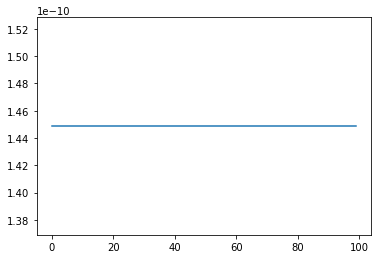

In [18]:
import matplotlib.pyplot as plt

plt.plot(best_fitnesses)



In [19]:
final_electricity = np.sum(best_solution[0][0]*X, axis = 1)

In [20]:
error = target['Consumption'] - final_electricity


day = np.arange(len(error))
day1 = np.arange(len(error) - 1)

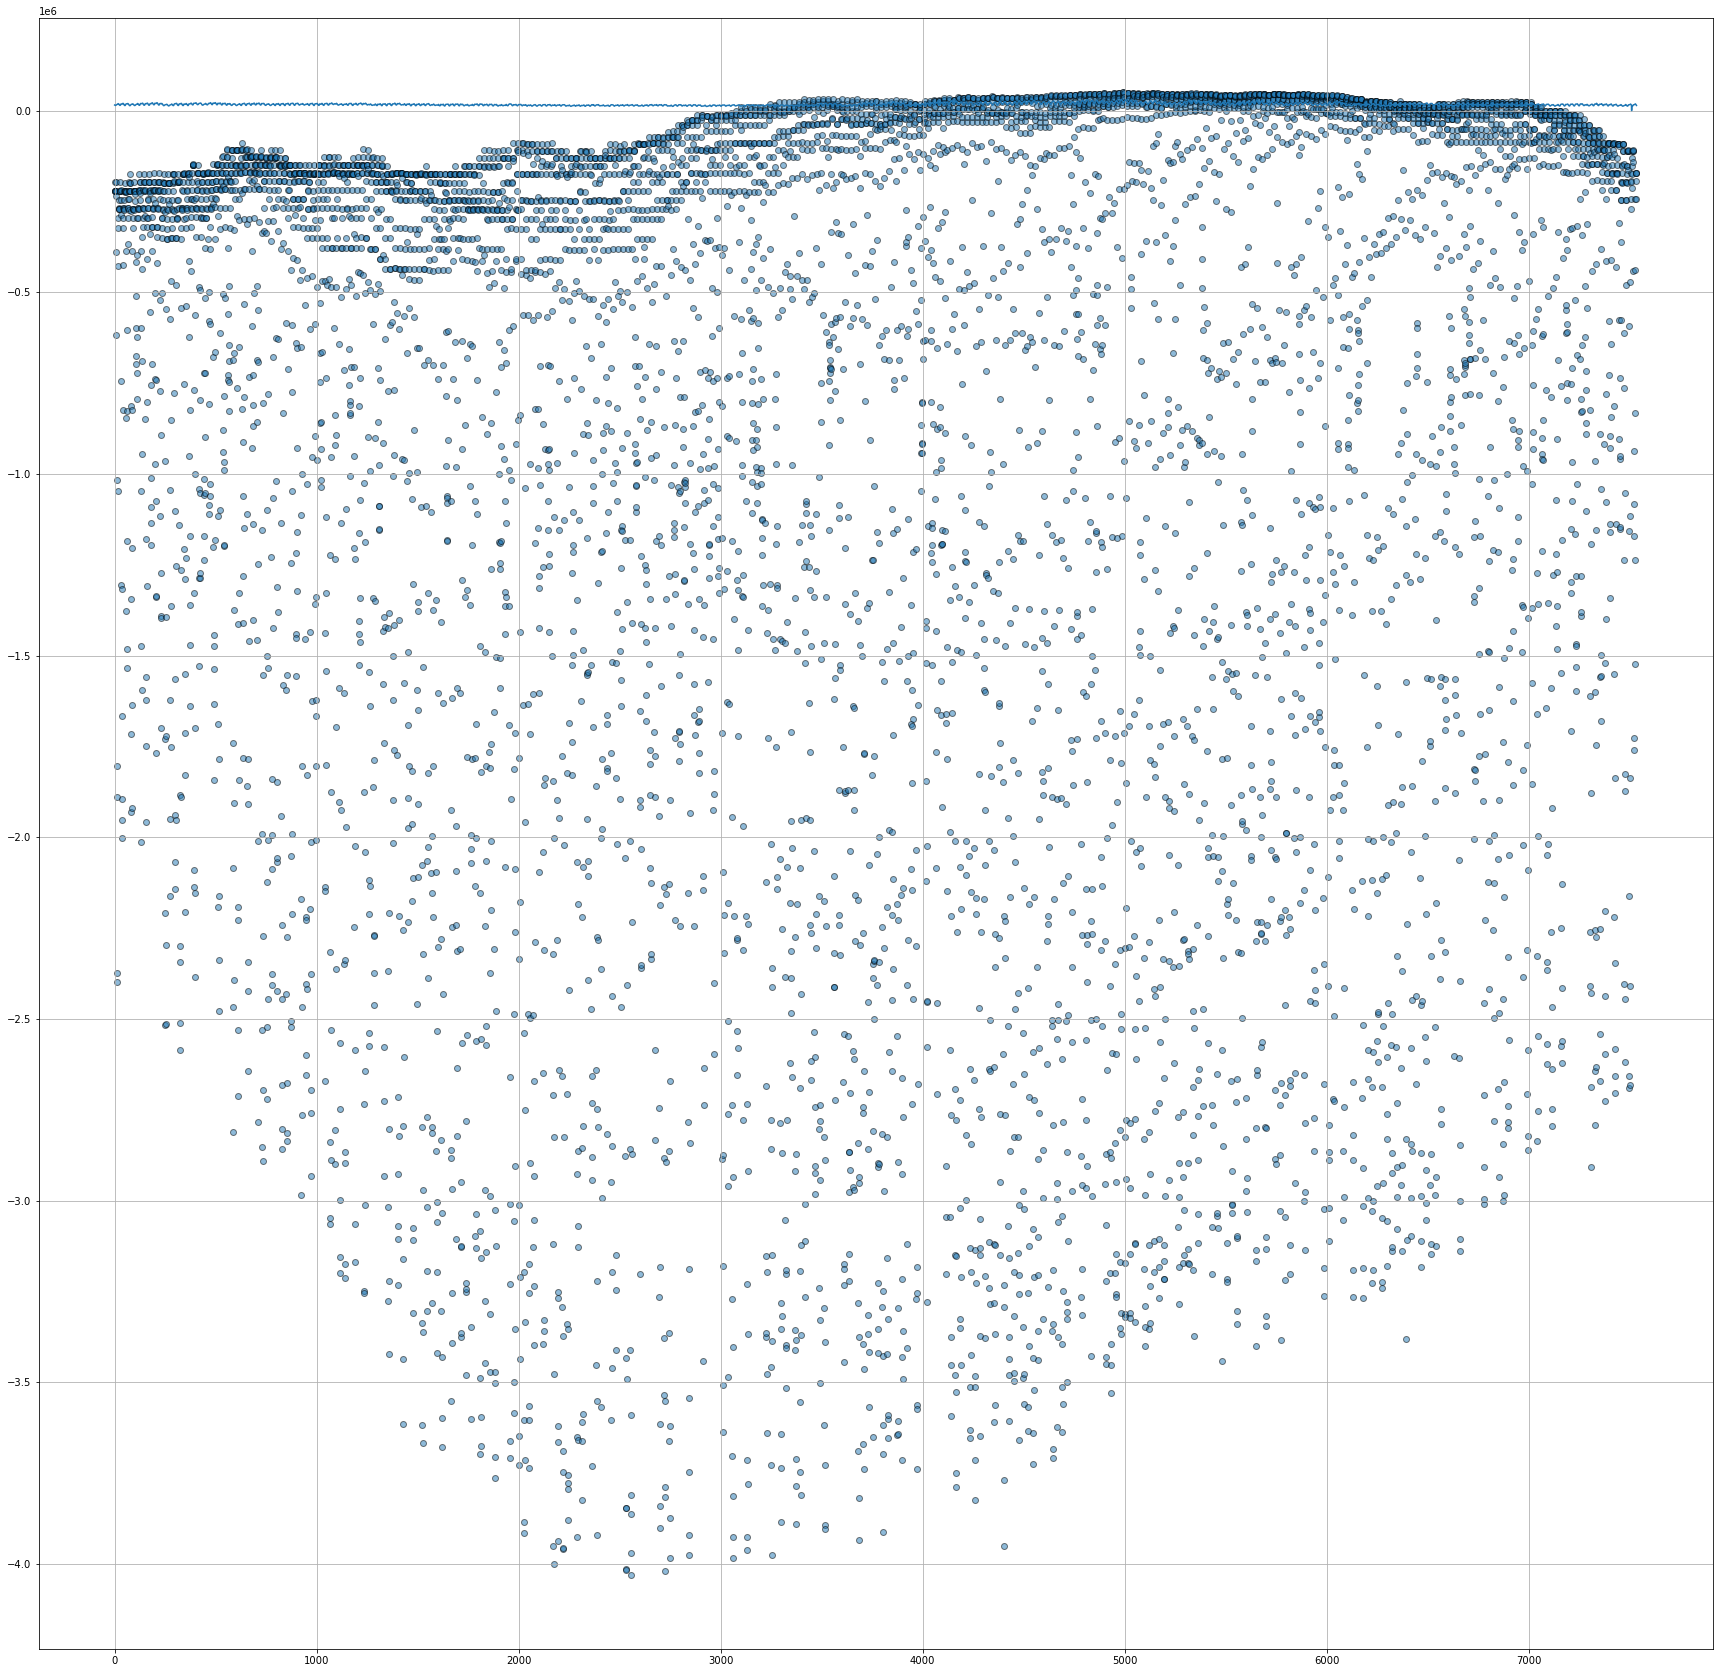

In [21]:
plt.figure(figsize=(30,30))

plt.scatter(x = day, y = error, alpha = 0.5, edgecolors= 'black')

plt.plot(day1, target['Consumption'])


plt.grid()

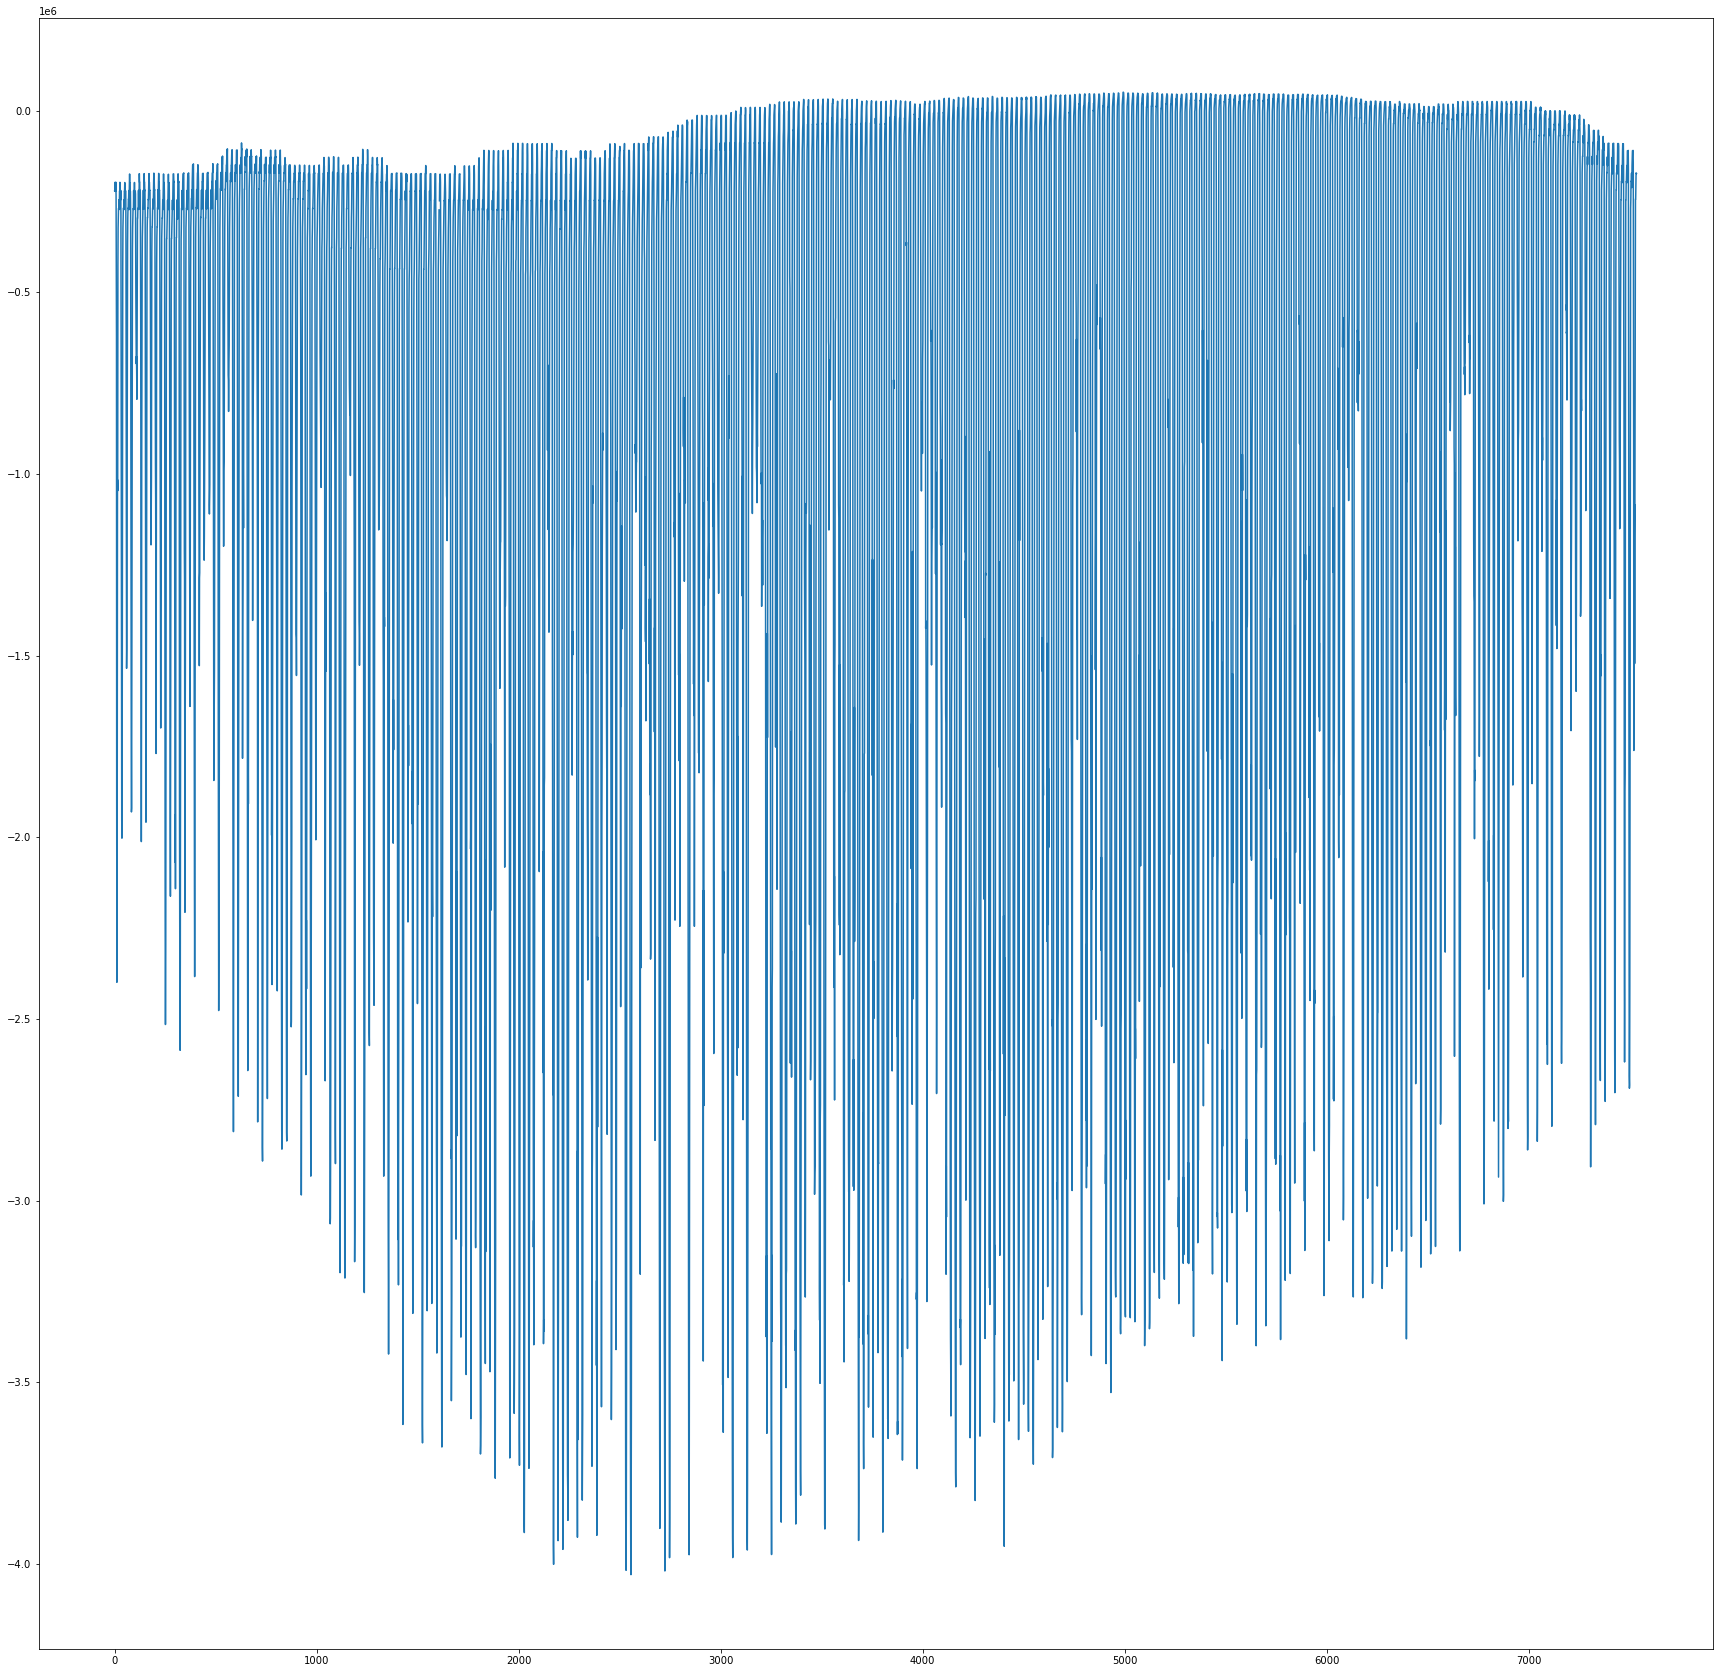

In [25]:
plt.figure(figsize=(30,30))

plt.plot(day, error)


In [23]:
print(len(day))
print(len(target['Consumption']))
print(len(error))
print(len(final_electricity))

7536
7535
7536
7535


ValueError: x and y must be the same size

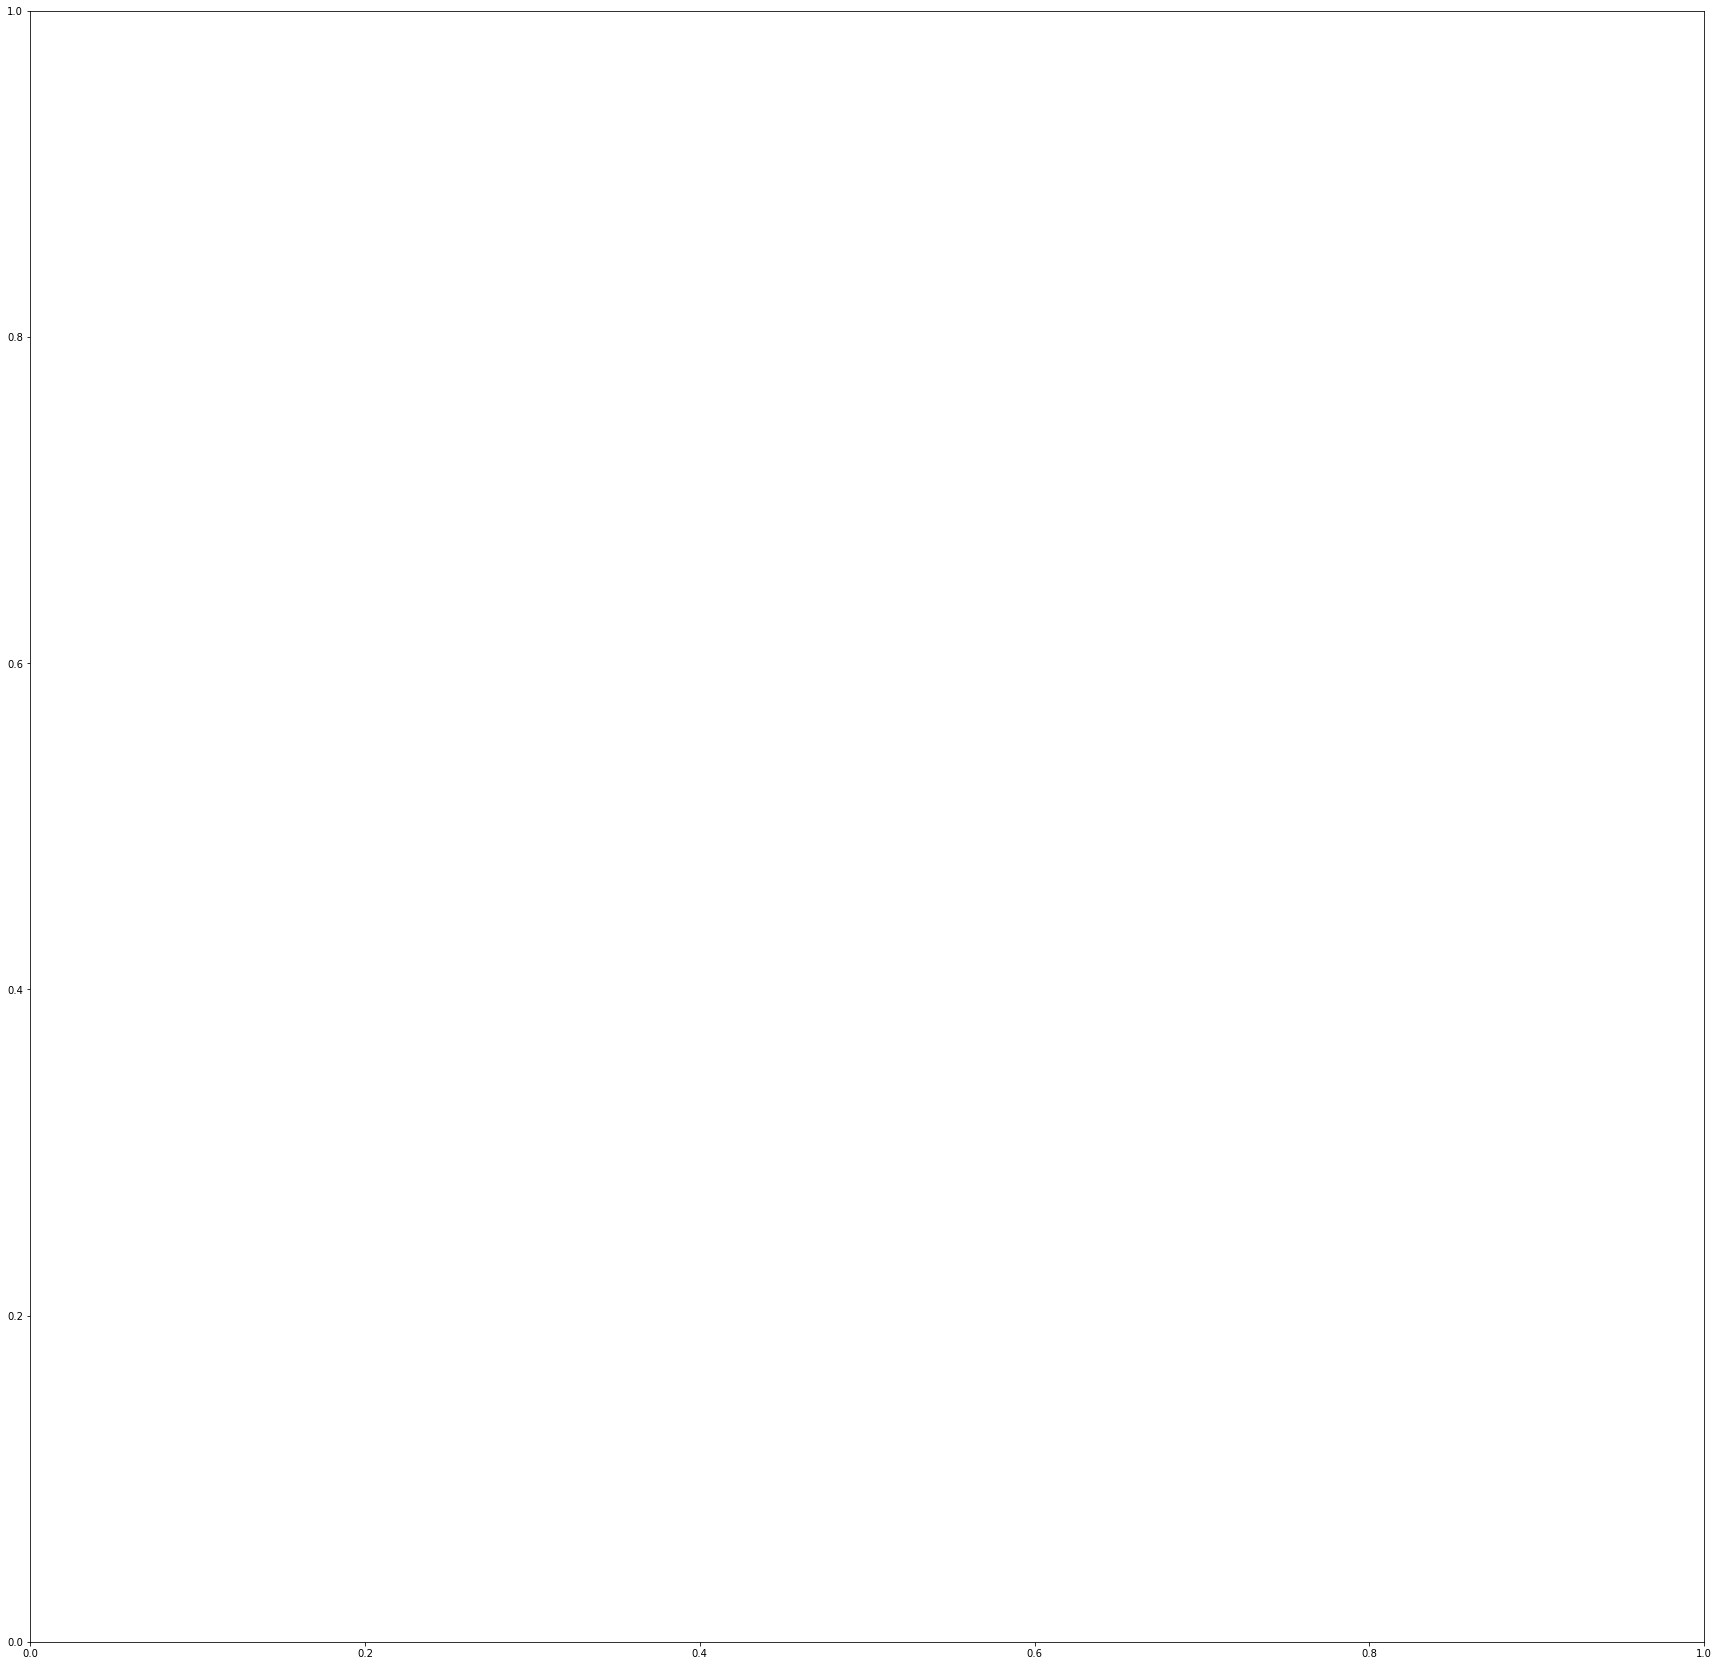

In [24]:
plt.figure(figsize=(30,30))

plt.scatter(x = day, y = final_electricity, alpha = 0.5, edgecolors= 'black')
plt.grid()

plt.plot(error)

In [ ]:
len(day)

In [ ]:
len(target)

In [ ]:
len(error)

In [ ]:
len(final_electricity)